In [314]:
#Script simples que exibe os preços de fechamento

In [315]:
!pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.55)


In [316]:
#Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

#Aprendizado
from sklearn.linear_model import LinearRegression

Importa yahoo finance e sobreescreve panda data reader


In [317]:
import yfinance as yf
yf.pdr_override()

In [318]:
#obtendo dados do mercado
df = web.get_data_yahoo('ITSA4.SA')

[*********************100%***********************]  1 of 1 completed


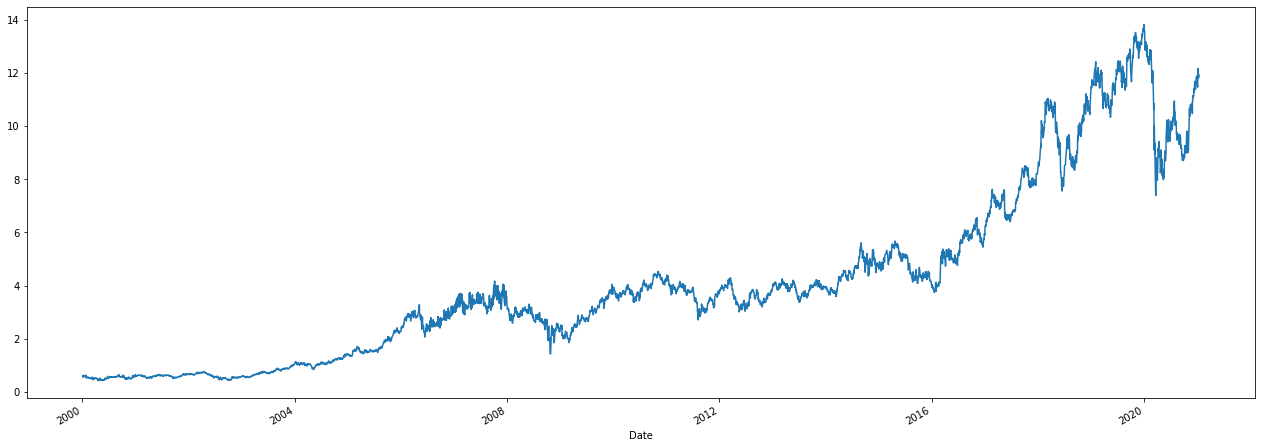

In [319]:
#Imprimindo o gráfico
df['Adj Close'].plot(figsize=(22,8));

In [320]:
#Criando dataframe para armazenar precos de fechamento, retorno e retornos com lag
dados = pd.DataFrame()

In [321]:
dados = df

In [322]:
dados['Close'] = df['Adj Close']

In [323]:
#Cálculo dos retornos
dados['Retorno'] = dados['Close'].pct_change(1)

In [324]:
#Cálculo das variáveis
# Construçao das Variaveis

#Retorno 4 dias
dados['Lag1'] = dados['Retorno'].pct_change(1)

# Desvio Padrao de 5 dias
dados["std5"] = dados["Retorno"].rolling(5).std()

# Desvio Padrao de 10 dias
dados["std10"] = dados["Retorno"].rolling(10).std()

# Desvio Padrao de 15 dias
dados["std15"] = dados["Retorno"].rolling(15).std()



In [325]:
#Grafico dos retornos
#.plot(figsize=(20,10))

In [326]:
dados

,Open,High,Low,Close,Adj Close,Volume,Retorno,Lag1,std5,std10,std15
Date,,,,,,,,,,,
2000-01-03,1.01835,1.14360,1.01290,0.609777,0.609777,10285107,NaN,NaN,NaN,NaN,NaN
2000-01-04,1.04558,1.04558,0.98023,0.551557,0.551557,12071740,-0.095478,NaN,NaN,NaN,NaN
2000-01-05,0.98568,1.06192,0.94756,0.597522,0.597522,9163033,0.083338,-1.872845,NaN,NaN,NaN
2000-01-06,1.05647,1.08370,1.05102,0.606711,0.606711,23085841,0.015378,-0.815475,NaN,NaN,NaN
2000-01-07,1.08914,1.10548,1.06192,0.603650,0.603650,11216095,-0.005046,-1.328102,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-07,11.71000,12.22000,11.63000,12.160000,12.160000,40121900,0.040205,1.003278,0.024115,0.019634,0.017002
2021-01-08,12.25000,12.35000,12.02000,12.080000,12.080000,20024600,-0.006579,-1.163634,0.023302,0.017782,0.016837
2021-01-11,12.03000,12.07000,11.74000,11.850000,11.850000,24381600,-0.019040,1.894037,0.024194,0.019484,0.017351


In [327]:
#Bibliotecas para treino e teste
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [328]:
dados.describe()

,Open,High,Low,Close,Adj Close,Volume,Retorno,Lag1,std5,std10,std15
count,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5.203000e+03,5202.000000,5182.000000,5198.000000,5193.000000,5188.000000
mean,5.642360,5.714455,5.561992,4.089061,4.089061,1.564296e+07,0.000961,NaN,0.023077,0.023939,0.024228
std,3.341654,3.375946,3.302032,3.231228,3.231228,1.284208e+07,0.028020,NaN,0.017830,0.015809,0.014967
min,0.773290,0.778740,0.735170,0.425921,0.425921,0.000000e+00,-0.150001,-inf,0.001626,0.005462,0.006835
25%,2.695615,2.728340,2.646490,1.512155,1.512155,7.129460e+06,-0.011998,-1.991288,0.012603,0.014611,0.015049
50%,5.820990,5.898180,5.732500,3.518910,3.518910,1.314479e+07,0.000000,-1.000000,0.017993,0.019020,0.019211
75%,7.260865,7.358795,7.163590,5.024061,5.024061,2.024148e+07,0.013292,0.004908,0.025822,0.026310,0.026445
max,14.200000,14.380000,14.120000,13.812769,13.812769,1.438683e+08,0.251469,inf,0.143260,0.110666,0.105822


In [329]:
dados = dados[~dados.isin([np.nan, np.inf, -np.inf]).any(1)]

In [330]:
dados.describe()

,Open,High,Low,Close,Adj Close,Volume,Retorno,Lag1,std5,std10,std15
count,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4.939000e+03,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000
mean,5.724573,5.797698,5.642591,4.155744,4.155744,1.583509e+07,0.000990,-1.026027,0.023318,0.024124,0.024401
std,3.329955,3.363622,3.290382,3.243491,3.243491,1.294342e+07,0.028147,5.231333,0.018050,0.016012,0.015151
min,0.773290,0.778740,0.735170,0.425921,0.425921,0.000000e+00,-0.150001,-113.128056,0.001626,0.005656,0.007097
25%,2.793735,2.829285,2.757415,1.578118,1.578118,7.327720e+06,-0.011910,-1.966786,0.012722,0.014662,0.015074
50%,5.871080,5.947120,5.779110,3.549868,3.549868,1.330596e+07,0.000000,-1.000000,0.018149,0.019113,0.019305
75%,7.307020,7.415665,7.223835,5.058223,5.058223,2.037853e+07,0.013207,-0.023116,0.026036,0.026465,0.026672
max,14.200000,14.380000,14.120000,13.812769,13.812769,1.438683e+08,0.251469,56.815962,0.143260,0.110666,0.105822


In [331]:
#Variável dependente
Y = dados['Retorno']

#Variáveis
X = dados.iloc[:,6:]

In [332]:
X

,Retorno,Lag1,std5,std10,std15
Date,,,,,
2000-01-24,-0.021284,0.021755,0.005488,0.018581,0.039109
2000-01-25,0.102424,-5.812339,0.054126,0.040267,0.039601
2000-01-26,-0.097833,-1.955171,0.071927,0.050840,0.042716
2000-01-27,-0.010927,-0.888305,0.071762,0.050664,0.042430
2000-01-28,-0.027626,1.528083,0.072089,0.050903,0.042826
...,...,...,...,...,...
2021-01-07,0.040205,1.003278,0.024115,0.019634,0.017002
2021-01-08,-0.006579,-1.163634,0.023302,0.017782,0.016837
2021-01-11,-0.019040,1.894037,0.024194,0.019484,0.017351


In [333]:
#0.3 tamanho da amostra para teste
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [334]:
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_test)

print_model = model.summary()

print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                Retorno   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.939e+27
Date:                Thu, 14 Jan 2021   Prob (F-statistic):                        0.00
Time:                        01:33:34   Log-Likelihood:                      1.0591e+05
No. Observations:                3457   AIC:                                 -2.118e+05
Df Residuals:                    3452   BIC:                                 -2.118e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------